In [3]:
import cv2

print(f"OpenCV version is: {cv2.__version__}")

if True:  # change to True if you want to use the notebook locally
    # and use cv2_imshow from matplotlib (eg. Vscode)
    import matplotlib.pyplot as plt

    def cv2_imshow(img):
        plt.figure(figsize=(10,10))
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis("off")
        plt.show()

OpenCV version is: 4.10.0


In [4]:
# TODO: detect, draw and show markers on images 1-6.png
import os

def get_all_file_paths(folder):
  file_paths = []

  for dirpath, _, filenames in os.walk(folder):
    for filename in filenames:
      if dirpath == folder:
        full_path = os.path.join(dirpath, filename)
        file_paths.append(full_path)

  return file_paths

folder_path = 'data'
all_files = get_all_file_paths(folder_path)

dictionary = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_APRILTAG_16h5)
parameters = cv2.aruco.DetectorParameters()
detector = cv2.aruco.ArucoDetector(dictionary, parameters)

for path in all_files:
   print(path)

data/img13.jpg
data/img05.jpg
data/img03.jpg
data/img12.jpg
data/img01.jpg
data/img15.jpg
data/img04.jpg
data/img07.jpg
data/img06.jpg
data/img09.jpg
data/img17.jpg
data/img08.jpg
data/img11.jpg
data/img16.jpg
data/img14.jpg
data/img10.jpg
data/img02.jpg


In [5]:
def detect_chessboard(filename):
  current = cv2.imread(filename)
  gray = cv2.cvtColor(current, cv2.COLOR_BGR2GRAY)
  ret, corners = cv2.findChessboardCorners(gray, (8,5), None)

  if ret:
    corners2 = cv2.cornerSubPix(
      gray,
      corners,
      (11,11),
      (-1,-1),
      (cv2.TermCriteria_MAX_ITER + cv2.TERM_CRITERIA_EPS, 30, 0.0001)
    )
    return corners2
  
  else:
    print("No chessboard found!")
    return None


def draw_corners(filename, corners, board_found):
  current = cv2.imread(filename)
  cv2.drawChessboardCorners(current, (8,5), corners, board_found)
  cv2_imshow(current)

detect_chessboard('data/img01.jpg')
""

''

In [6]:
import numpy as np

def get_objpoints(shape, width):
  x, y = shape
  xx, yy = np.meshgrid(
    np.linspace(0, width * (x - 1), x), 
    np.linspace(0, width * (y - 1), y), 
  )
  xx, yy = xx.reshape(-1), yy.reshape(-1)
  objarr = np.vstack([xx, yy, np.zeros(len(xx))]).T

  return objarr.astype(np.float32)

def get_objpoints2():
  objp = np.zeros((6*7,3), np.float32)
  objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)
  return objp

get_objpoints((7, 6), 1)
""

''

In [7]:
def calibrate(filename):
  current = cv2.imread(filename)
  gray = cv2.cvtColor(current, cv2.COLOR_BGR2GRAY)

  subcorners = detect_chessboard(filename)
  objpoints = get_objpoints((8,5), 30)

  return cv2.calibrateCamera(
    objectPoints = [objpoints],
    imagePoints = [subcorners],
    imageSize = gray.shape[::-1],
    cameraMatrix = None,
    distCoeffs = None,
  )


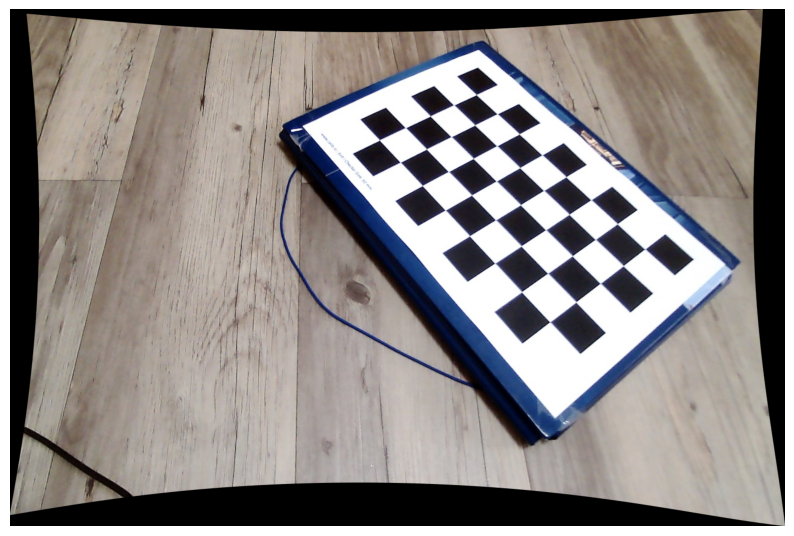

In [15]:
def undistort(filename, crop = False):
  current = cv2.imread(filename)
  gray = cv2.cvtColor(current, cv2.COLOR_BGR2GRAY)
  size = gray.shape[::-1]

  cal = calibrate(filename)
  ret, cMat, dCoeff, rvecs, tvecs = cal

  newCMat, roi = cv2.getOptimalNewCameraMatrix(
    cameraMatrix = cMat,
    distCoeffs = dCoeff,
    imageSize = size,
    alpha = float(not crop),
    newImgSize = size,
  )

  # print(cMat)
  # print(newCMat) 

  undistort, rectify = cv2.initUndistortRectifyMap(
    cameraMatrix = cMat,
    distCoeffs = dCoeff,
    R = np.eye(3),
    newCameraMatrix = newCMat,
    size = size,
    m1type = cv2.CV_32FC1,
  )

  undistorted = cv2.remap(
    src = current,
    map1 = undistort,
    map2 = rectify,
    interpolation = cv2.INTER_LINEAR,
  )

  cv2_imshow(undistorted)

undistort('data/img01.jpg')
